<a href="https://colab.research.google.com/github/techbrothers3/Coffee-Tasting-EDA/blob/main/Coffee_Analysis_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CoffeeDataAnalysis:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def load_data(self, file_path):
        self.df = pd.read_csv(file_path)

    def drop_columns(self, columns_to_drop):
      self.df.drop(columns=columns_to_drop, inplace=True)

    def remove_columns_with_high_nulls(self, threshold=0.9):
        threshold_value = threshold * len(self.df)
        self.df.dropna(axis=1, thresh=threshold_value, inplace=True)

    def remove_rows_with_high_nulls(self, threshold=0.9):
        threshold_value = threshold * len(self.df.columns)
        self.df.dropna(axis=0, thresh=threshold_value, inplace=True)

    def preprocess_coffee_cups_column(self):
      self.df['How many cups of coffee do you typically drink per day?'].replace('More than 4', '6', inplace=True)
      # Replace 'Less than 1' with '0'
      self.df['How many cups of coffee do you typically drink per day?'].replace('Less than 1', '0', inplace=True)
      self.df['How many cups of coffee do you typically drink per day?'] = pd.to_numeric(
          self.df['How many cups of coffee do you typically drink per day?'], errors='coerce'
    )


    def fill_missing_values(self):
        self.df.ffill(inplace=True)

    def convert_boolean_columns(self, bool_val_column):
        bool_values = self.df[bool_val_column].unique()
        for column in self.df.columns:
            unique_values = self.df[column].unique()
            if set(unique_values) == set(bool_values):
                self.df[column] = self.df[column].astype(bool)

    def plot_age_distribution(self):
        sns.countplot(x='What is your age?', data=self.df)
        plt.xticks(rotation=75)
        plt.show()

    def plot_coffee_cups_distribution(self):
        sns.histplot(self.df['How many cups of coffee do you typically drink per day?'], color='chocolate')
        plt.title('Distribution of Coffee Cups')
        plt.show()

    def plot_boolean_columns_distribution(self):
        for column in self.df.select_dtypes(include=['bool']).columns:
            plt.figure(figsize=(12, 6))
            plt.title(f'Distribution of {column}')
            value_counts = self.df[column].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.show()

    def plot_numeric_columns_distribution(self):
        for column in self.df.select_dtypes(include=['int', 'float']).columns:
            sns.histplot(self.df[column], color='skyblue')
            plt.title(f'Distribution of {column}')
            plt.show()

    def plot_string_columns_distribution(self):
        for column in self.df.select_dtypes(include=['object']).columns:
            plt.figure(figsize=(12, 8))
            sns.countplot(data=self.df, y=column, palette='viridis')
            plt.xlabel('Count')
            plt.title(f'Distribution of {column}')
            plt.show()



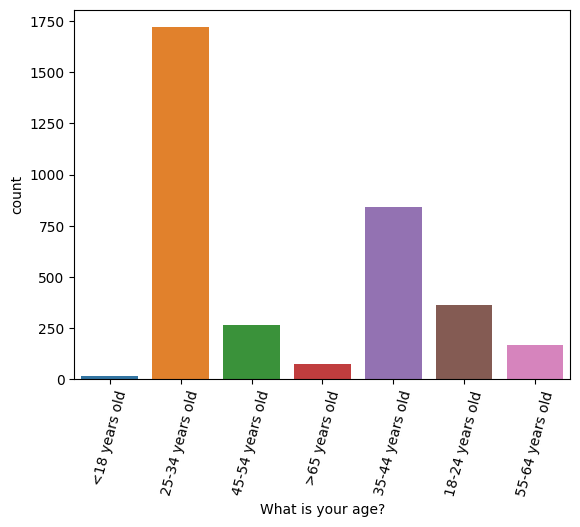

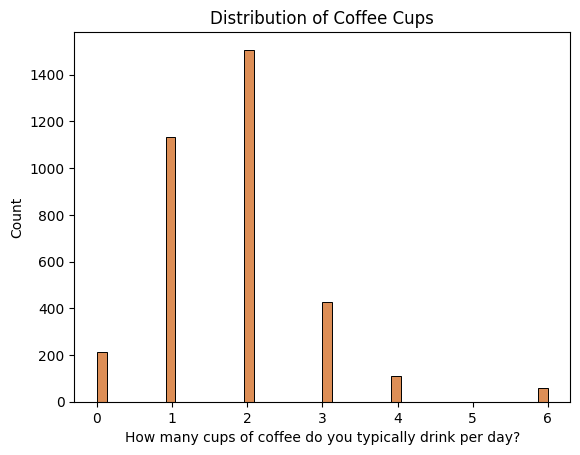

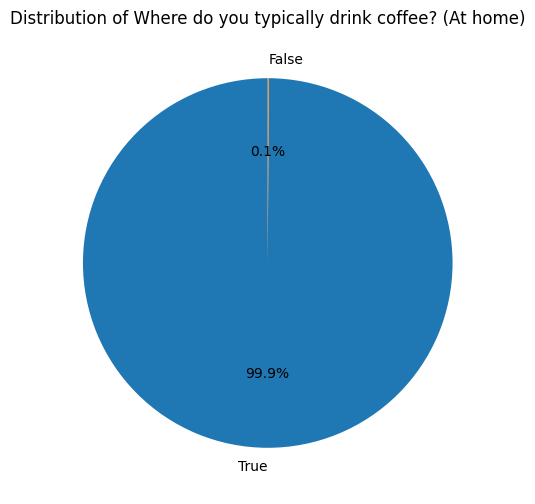

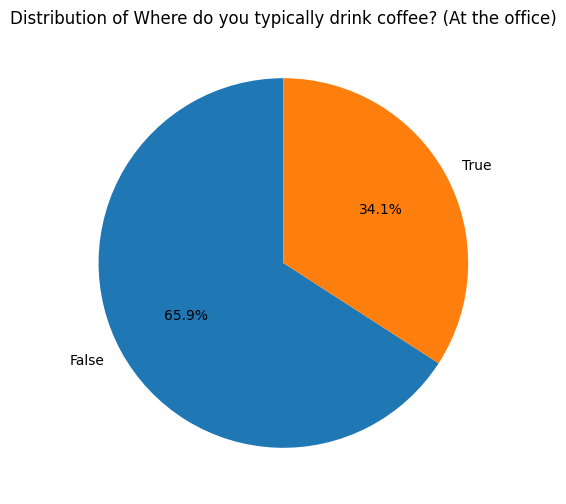

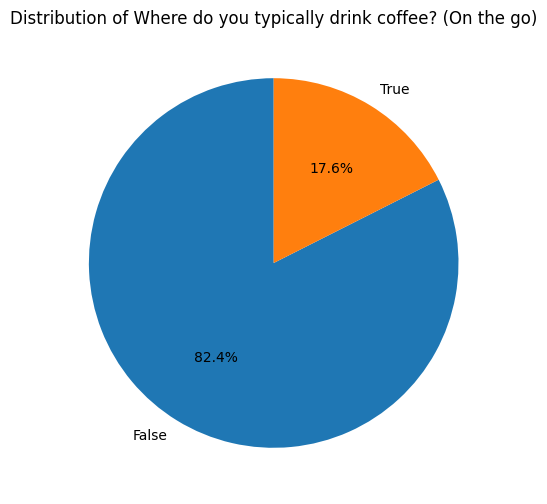

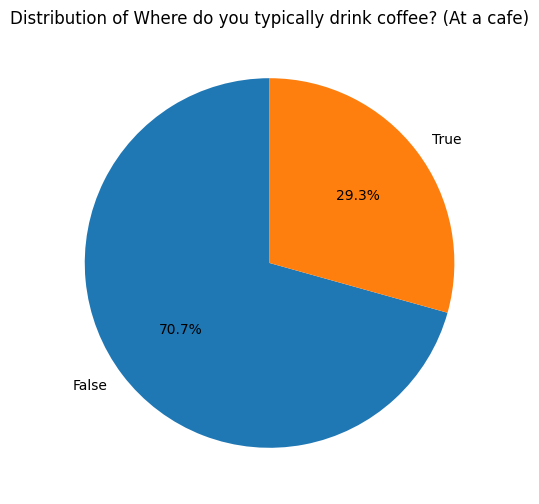

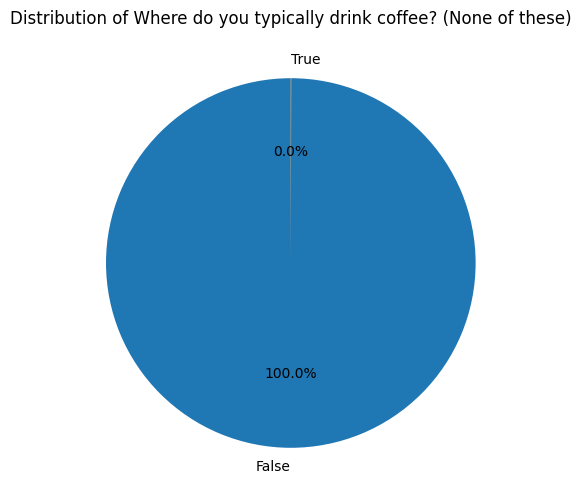

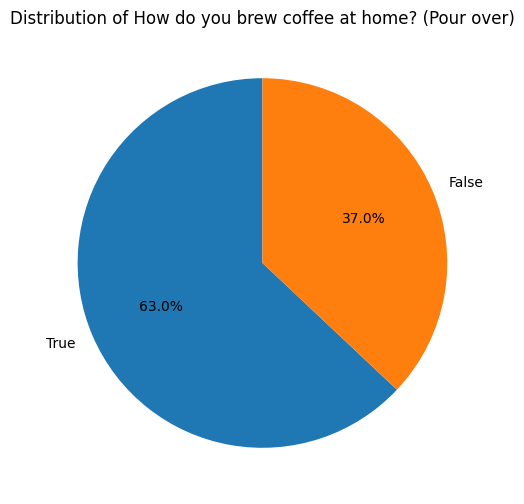

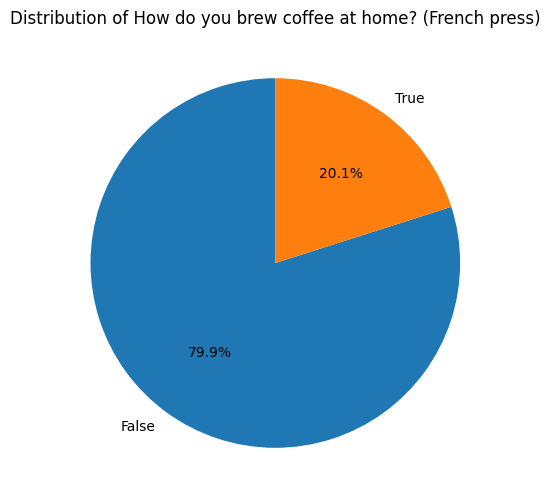

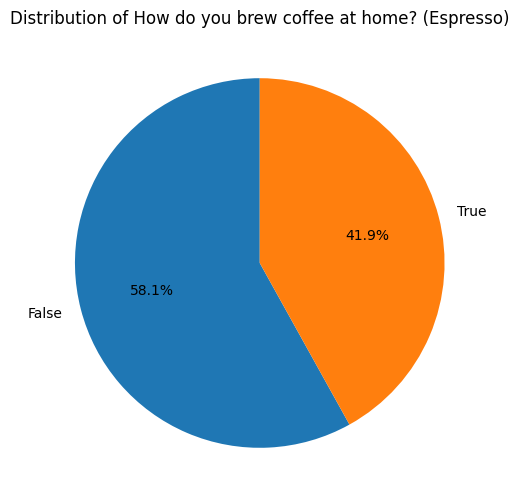

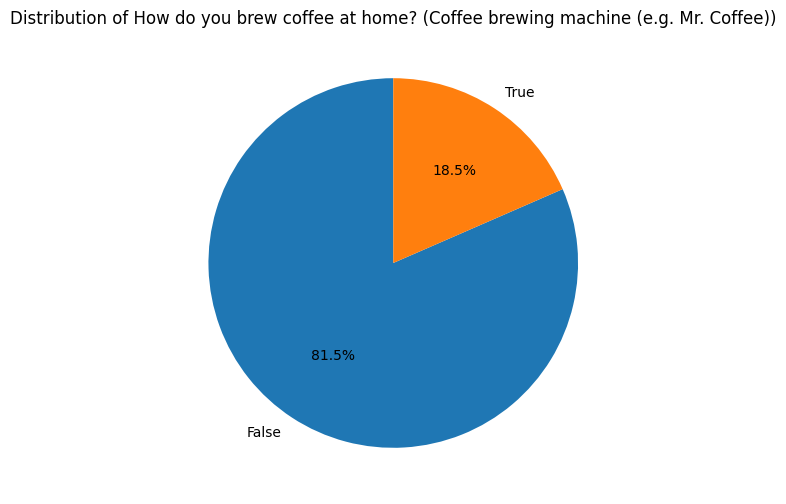

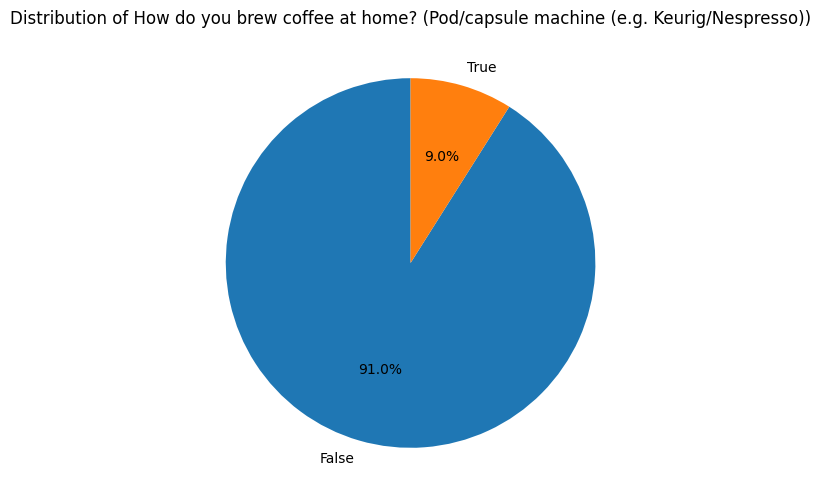

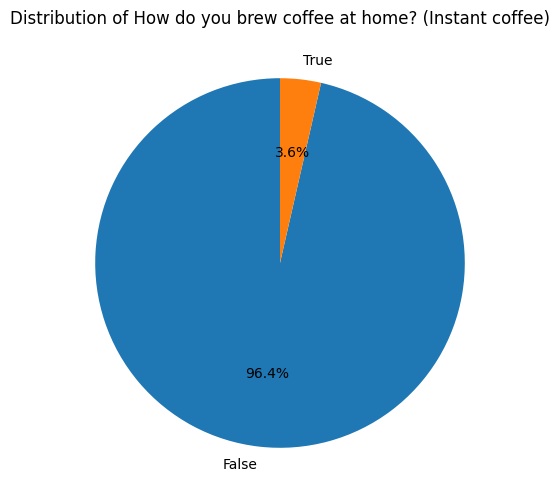

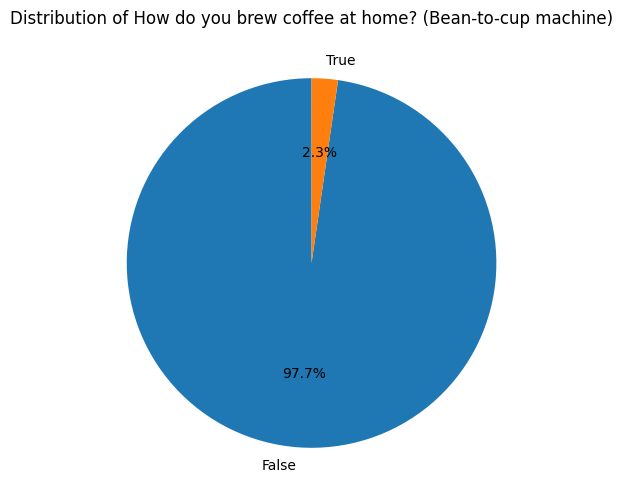

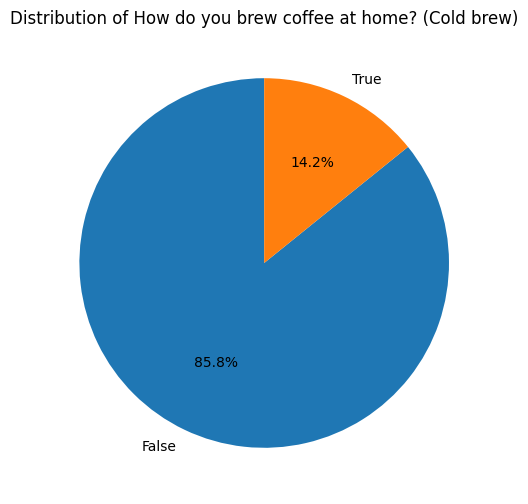

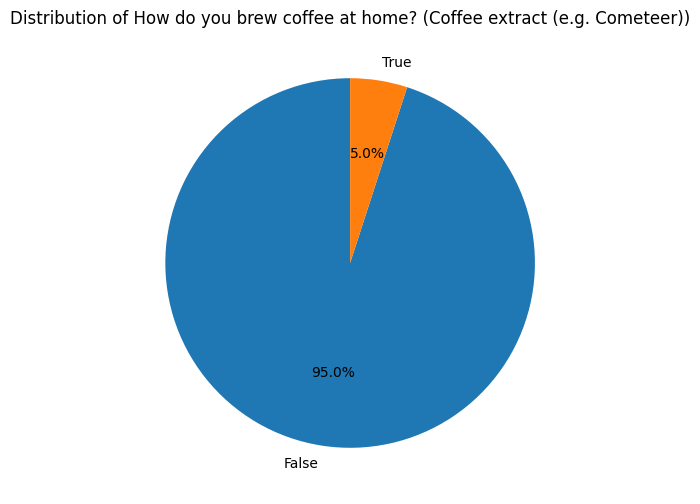

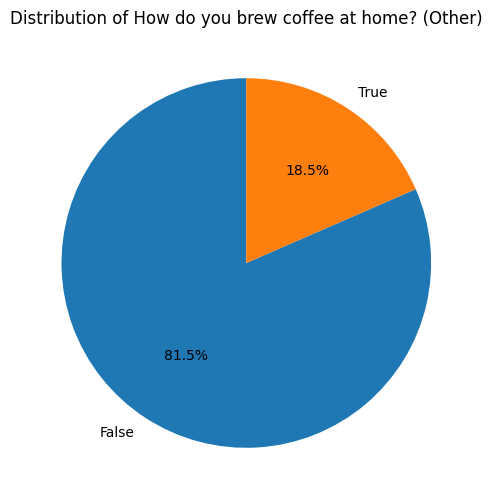

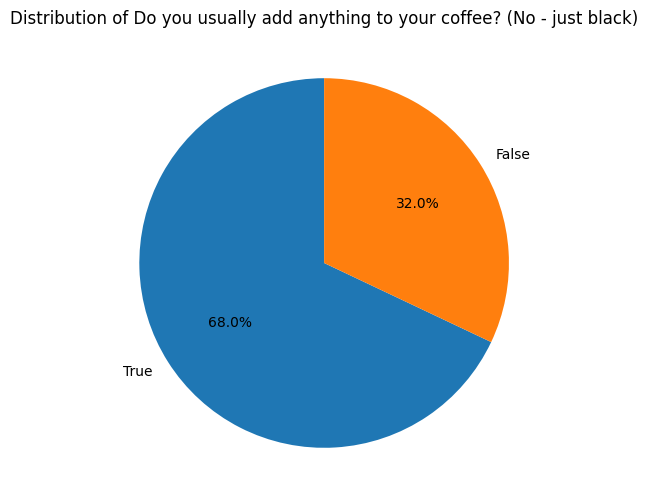

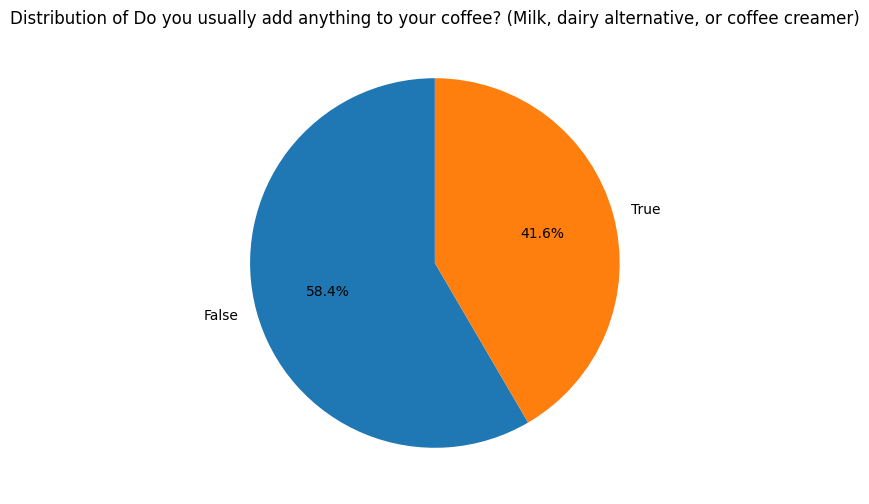

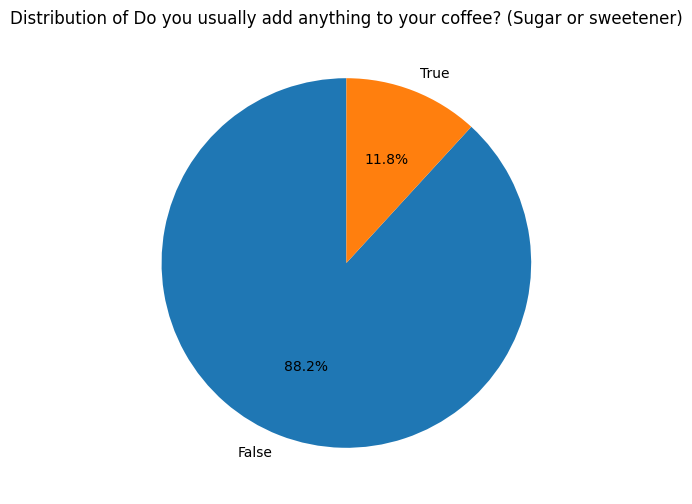

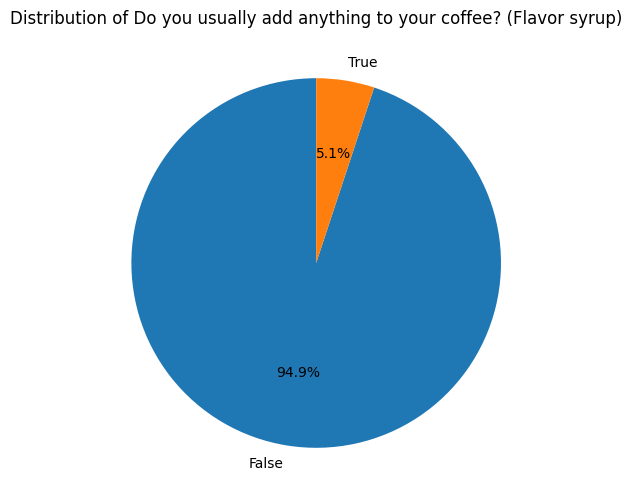

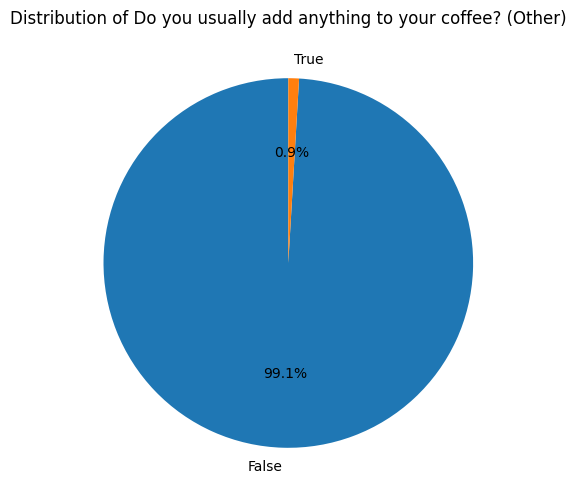

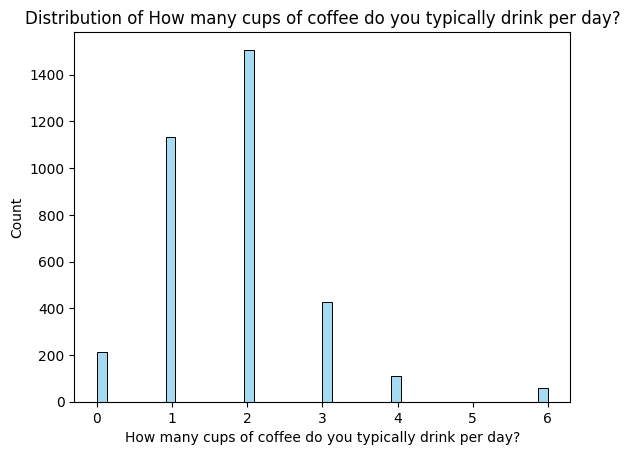

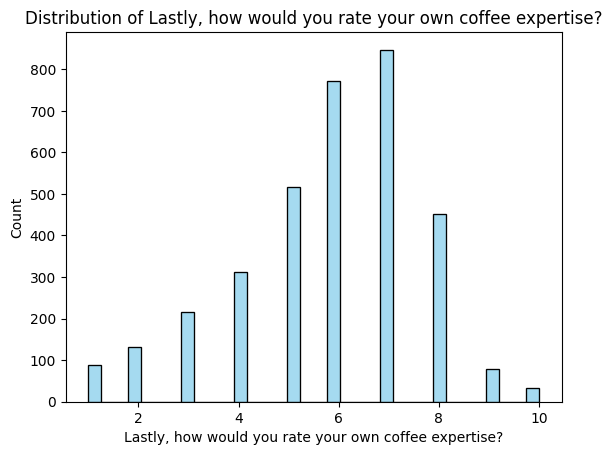

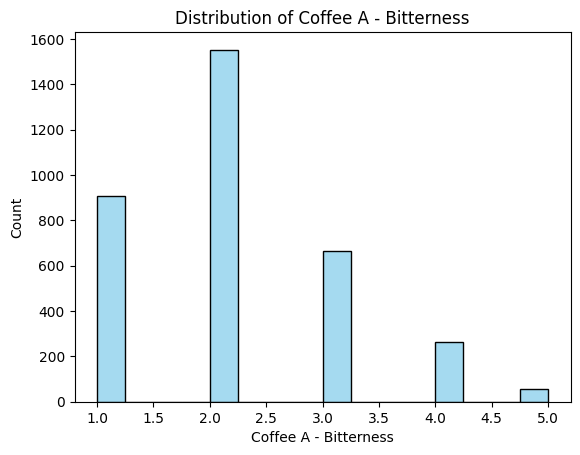

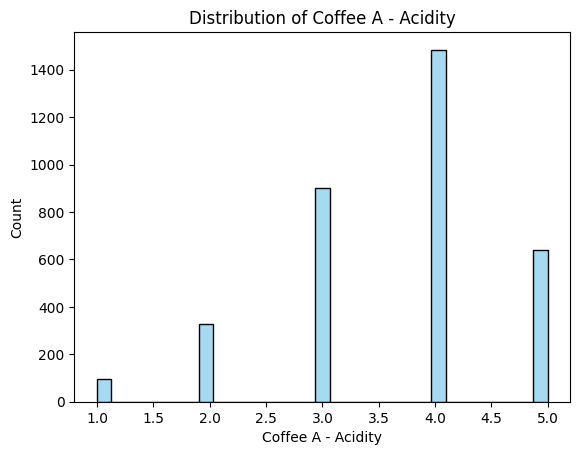

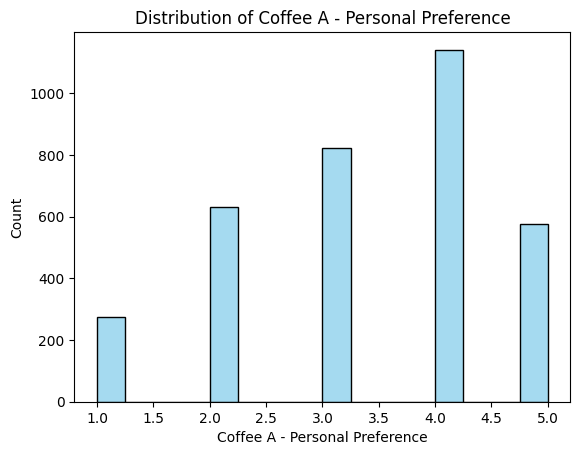

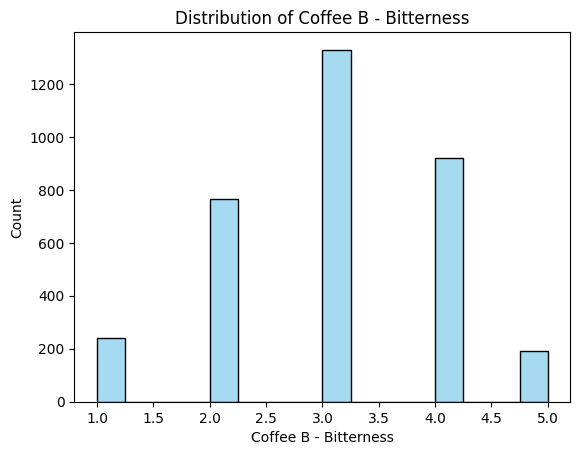

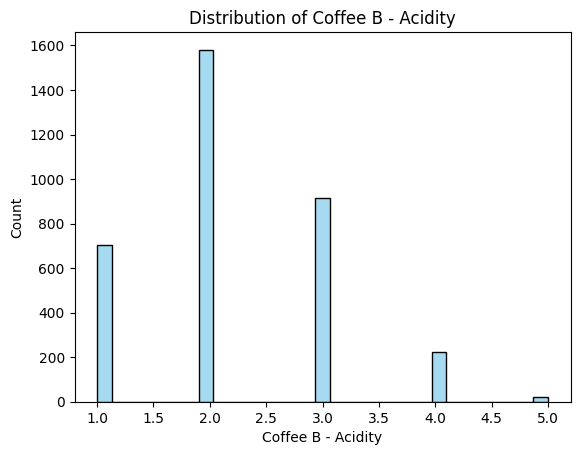

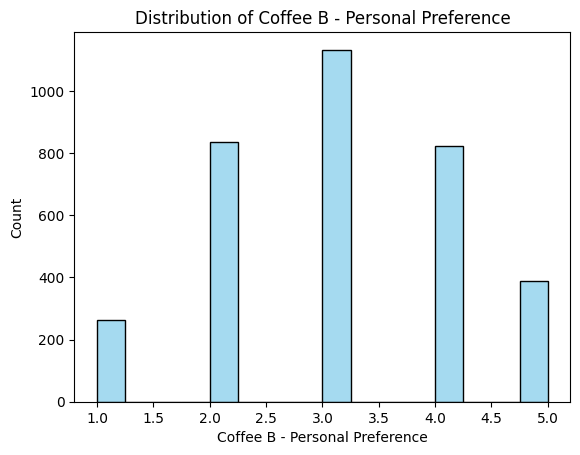

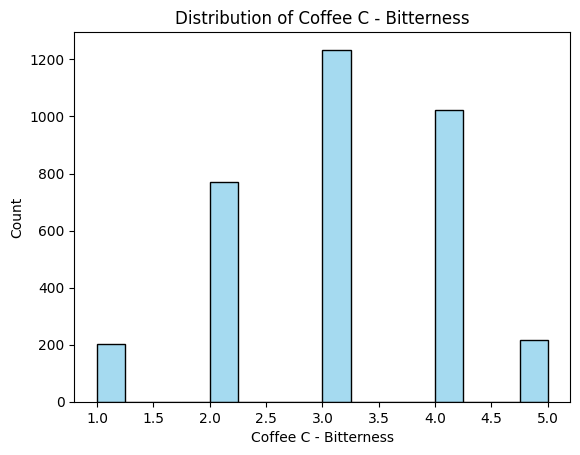

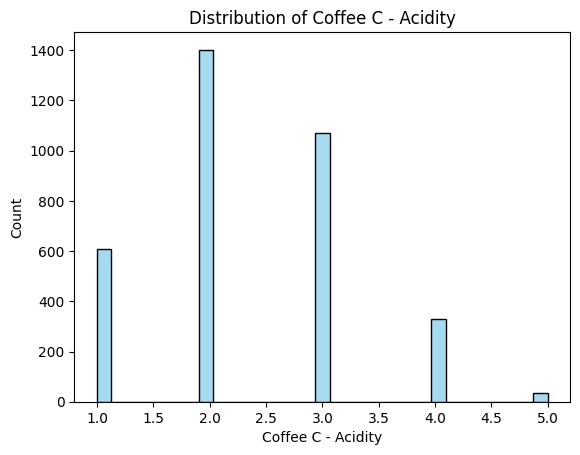

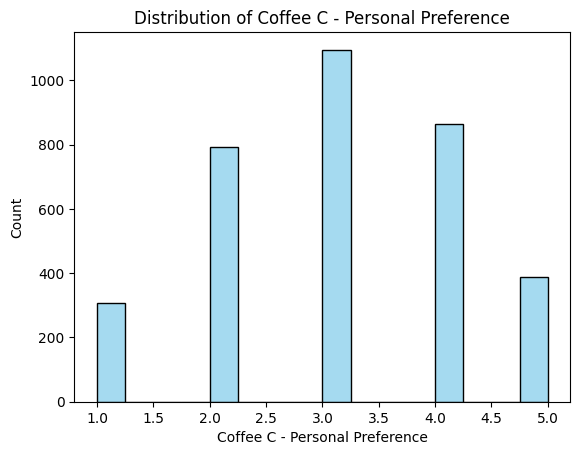

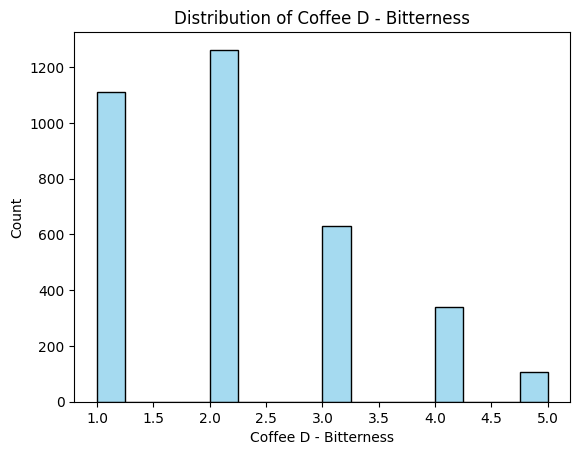

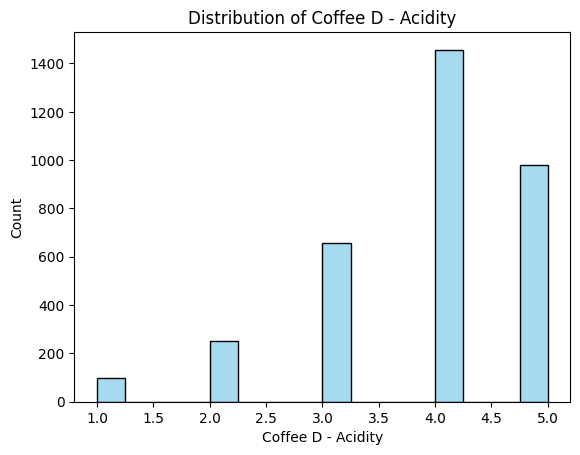

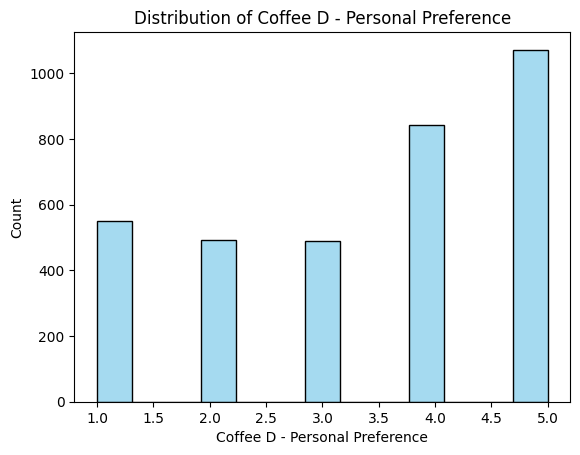

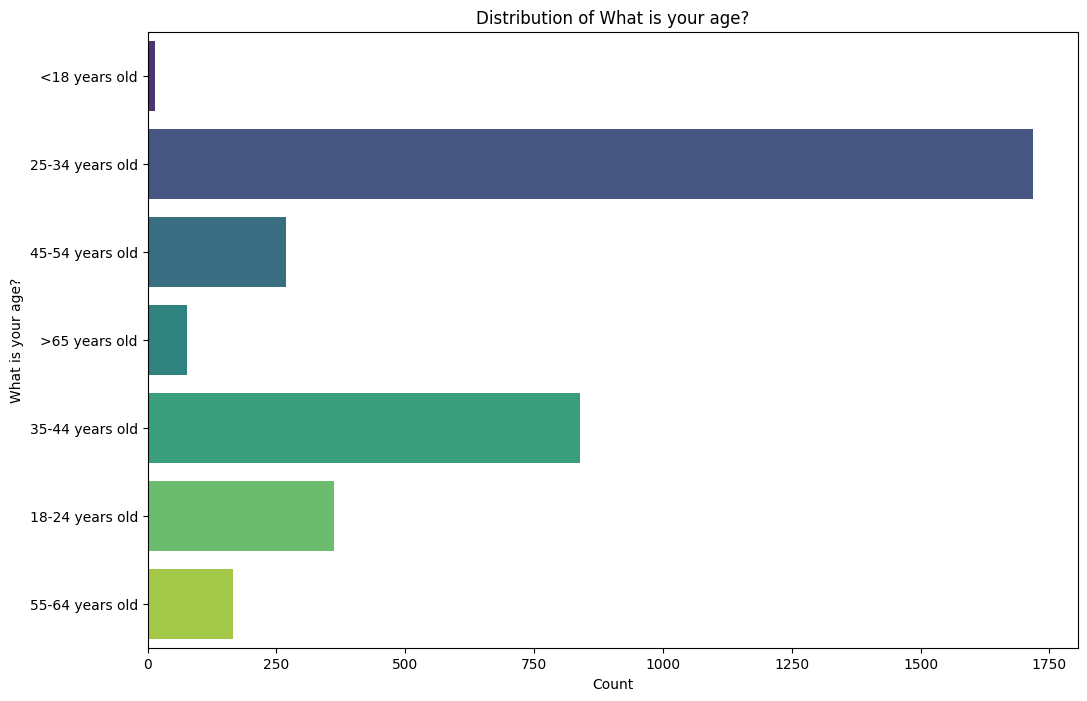

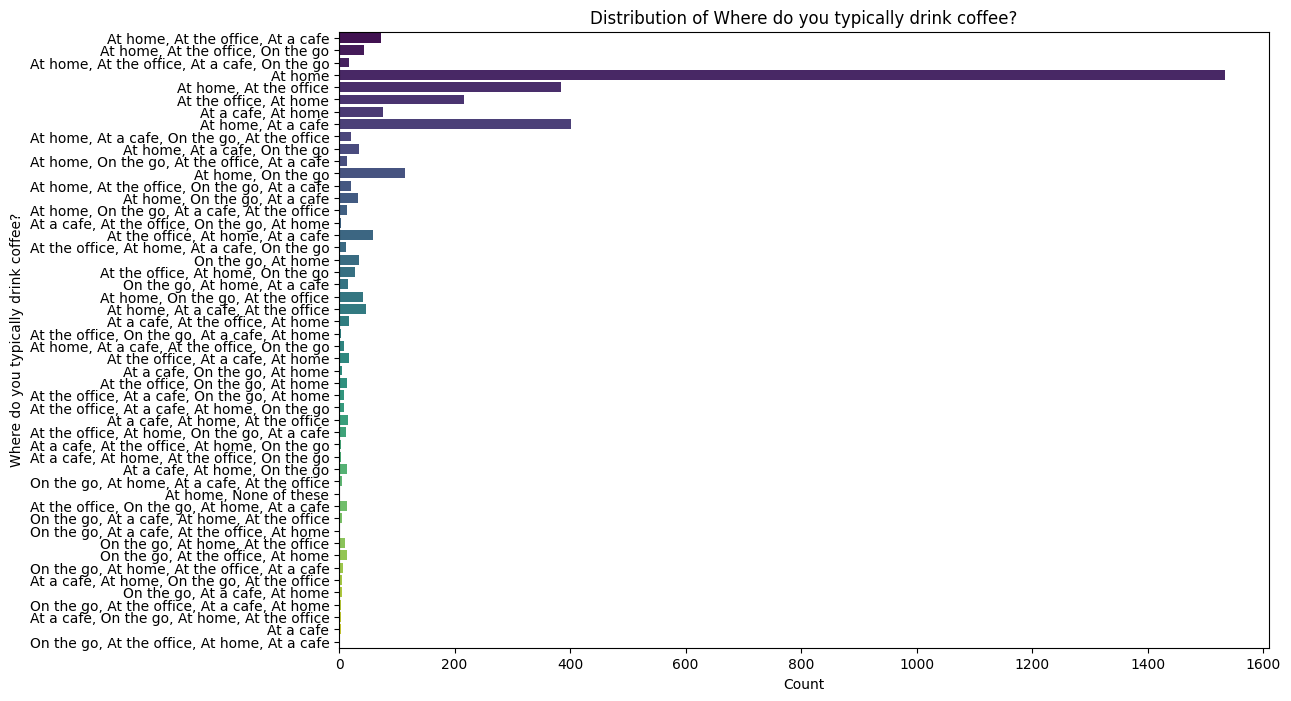

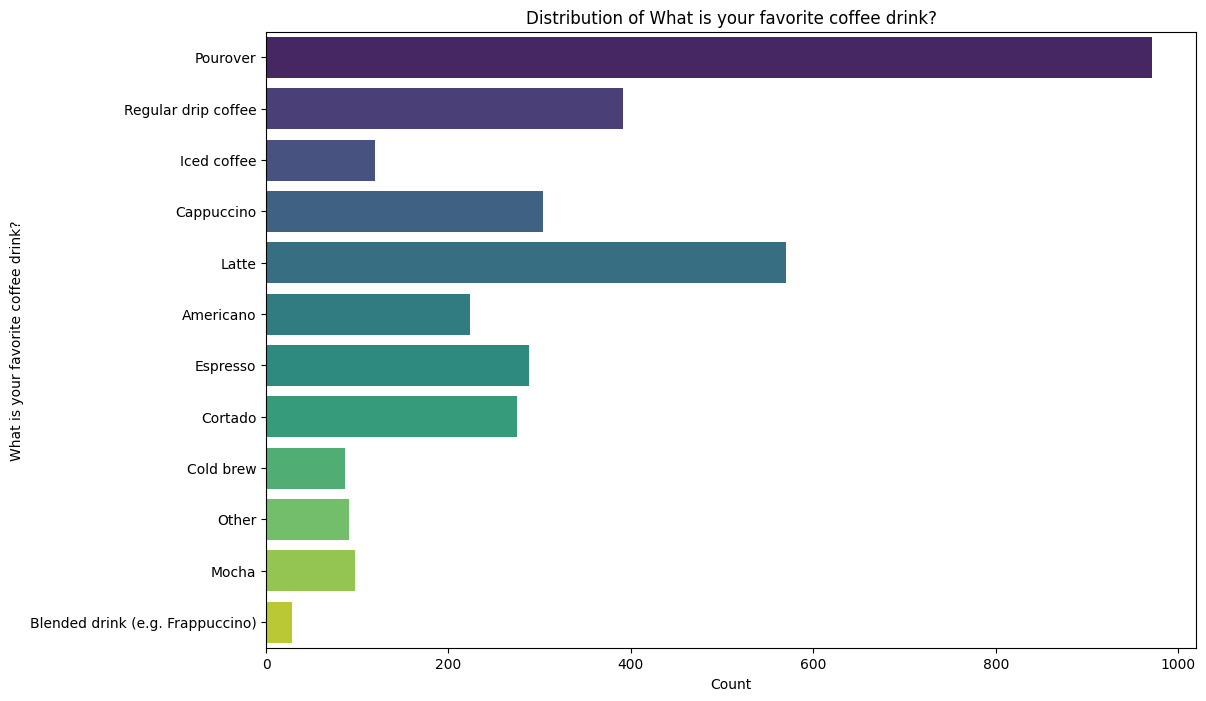

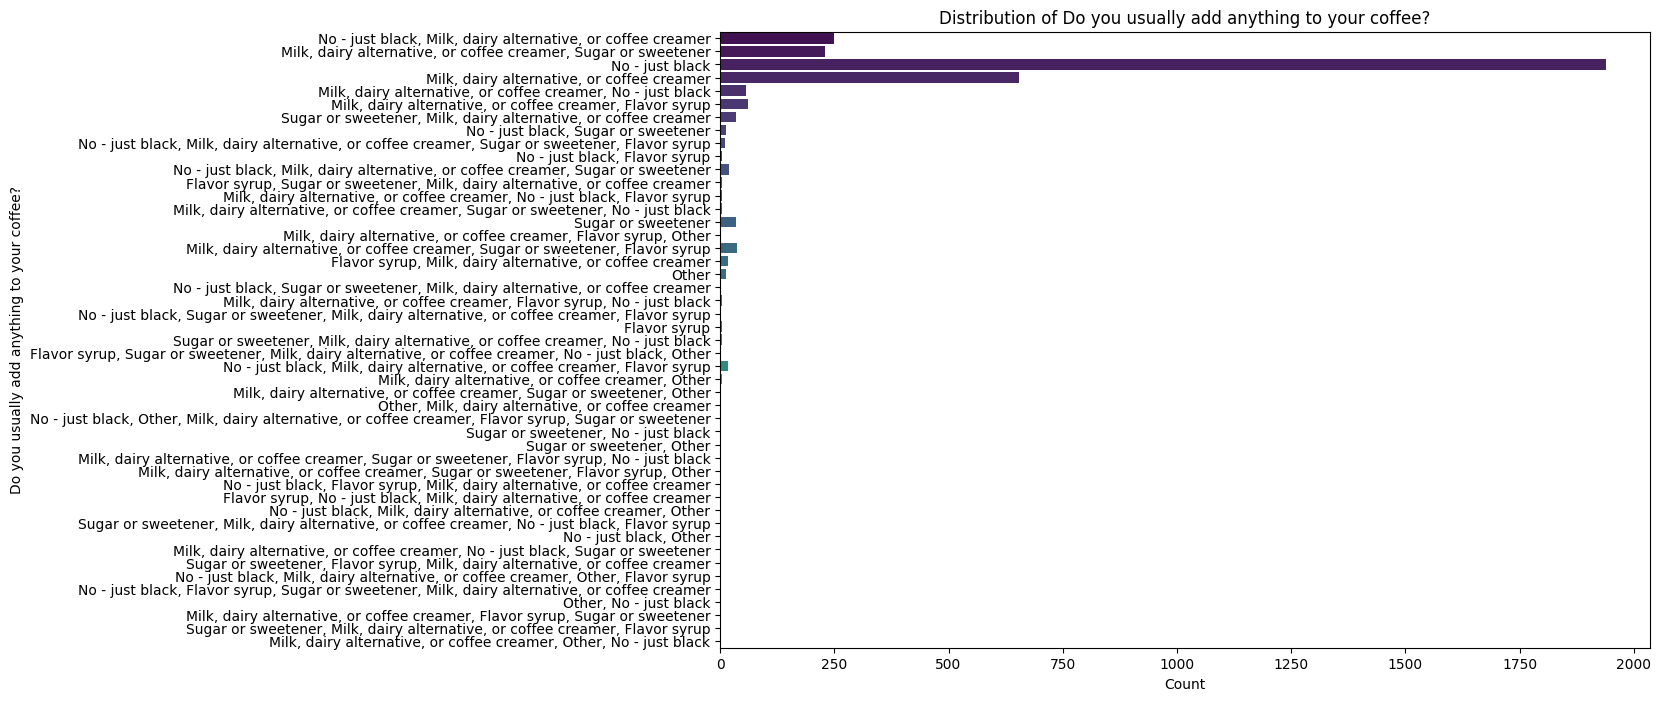

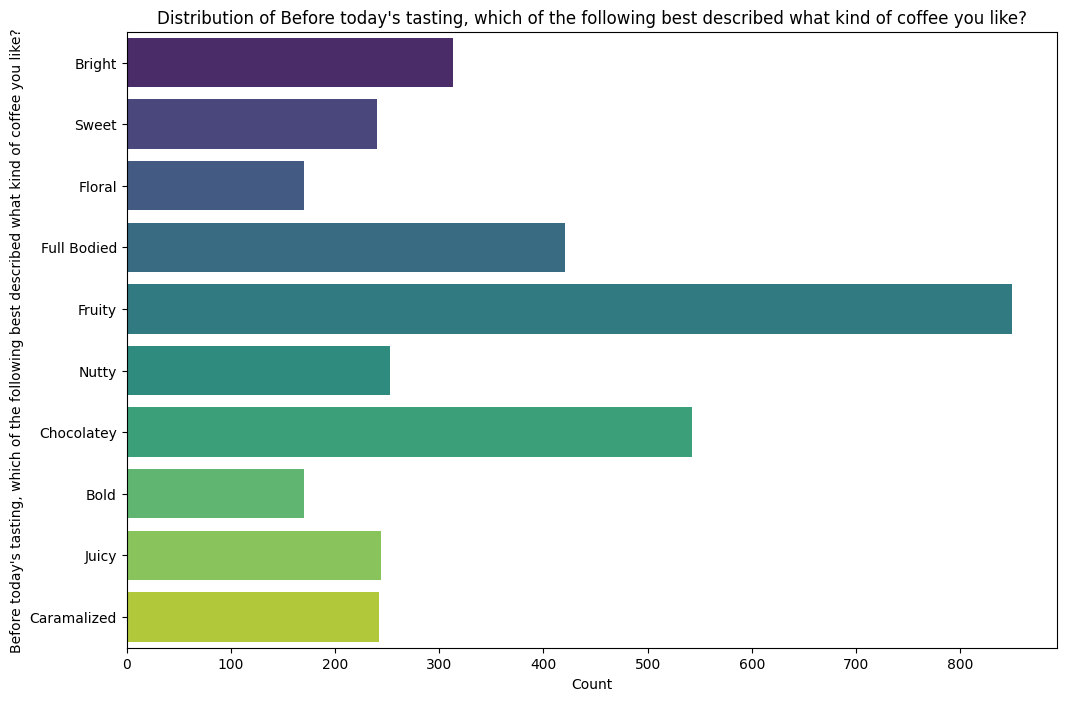

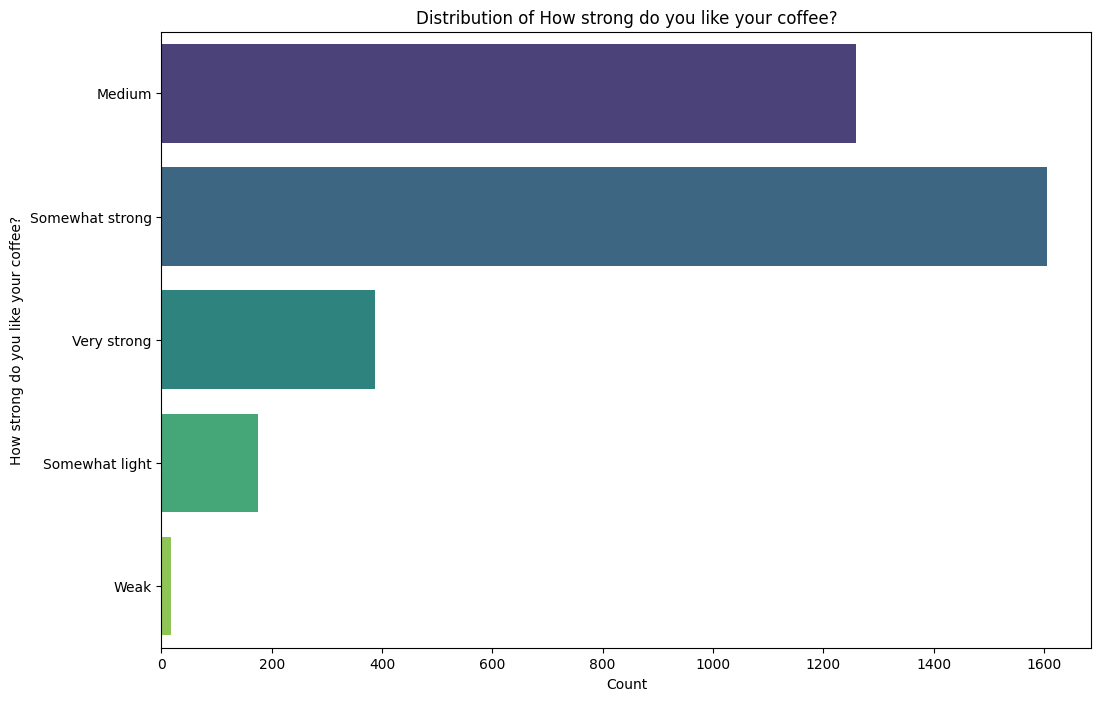

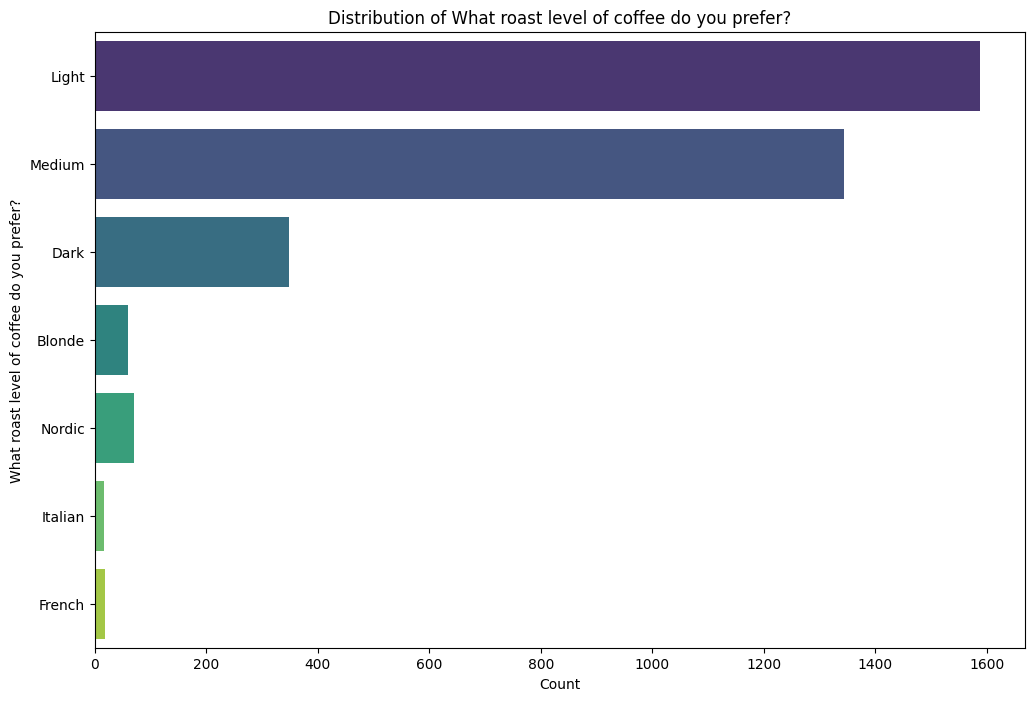

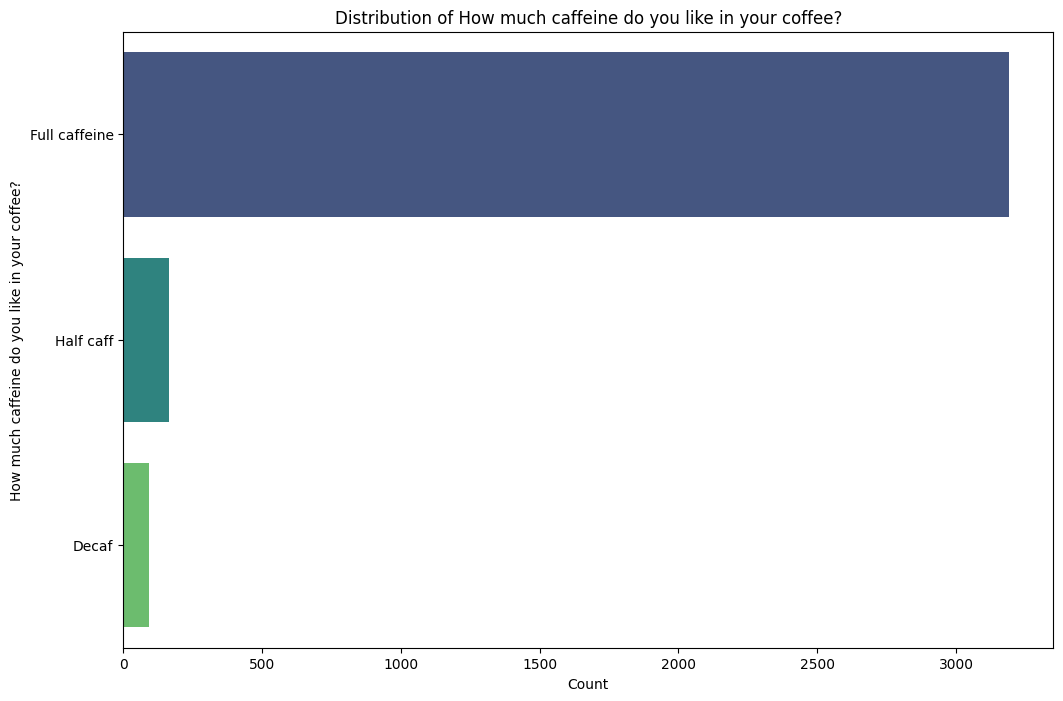

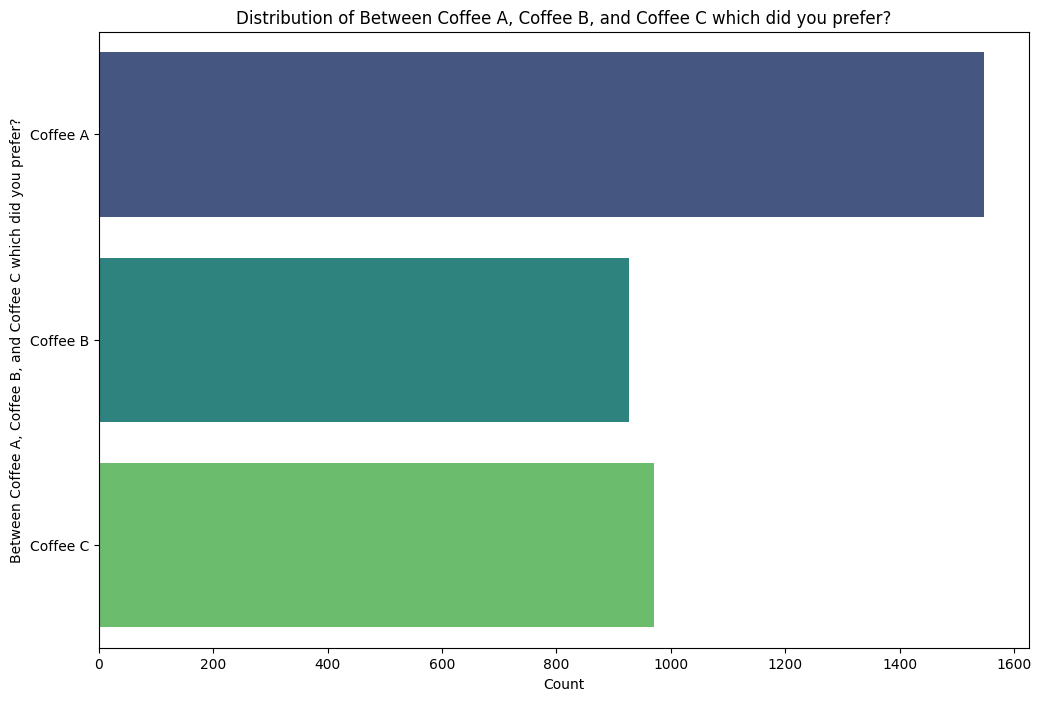

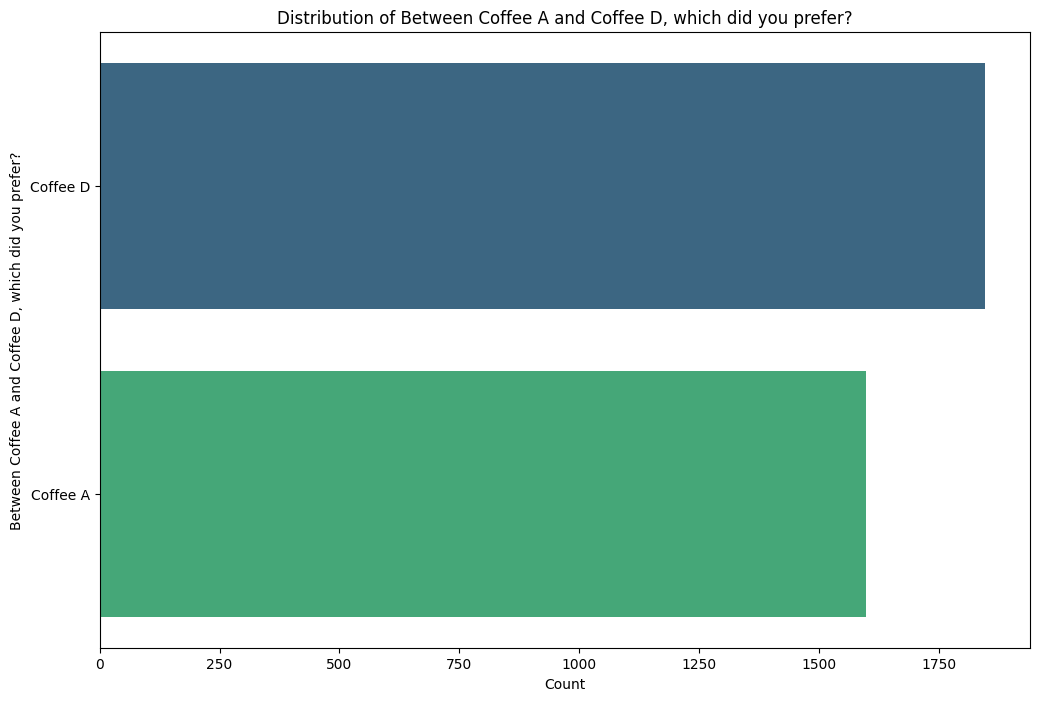

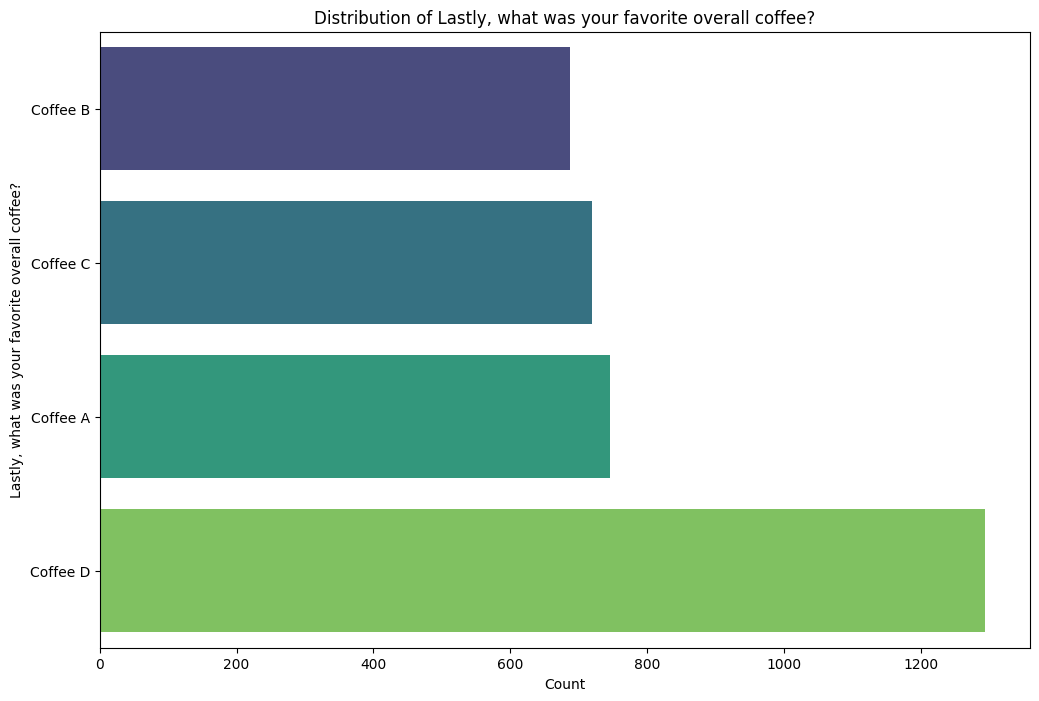

In [15]:

# Example usage:
# Create an instance of DataAnalysis
coffee_analysis = CoffeeDataAnalysis('/content/drive/MyDrive/GACTT_RESULTS_ANONYMIZED_v2.csv')
columns_to_drop = ['How do you brew coffee at home?', 'Submission ID']
coffee_analysis.drop_columns(columns_to_drop)

# Perform data analysis tasks using the methods of the class
coffee_analysis.remove_columns_with_high_nulls()
coffee_analysis.remove_rows_with_high_nulls()
coffee_analysis.preprocess_coffee_cups_column()
coffee_analysis.fill_missing_values()
coffee_analysis.convert_boolean_columns('How do you brew coffee at home? (Pour over)')
coffee_analysis.plot_age_distribution()
coffee_analysis.plot_coffee_cups_distribution()
coffee_analysis.plot_boolean_columns_distribution()
coffee_analysis.plot_numeric_columns_distribution()
coffee_analysis.plot_string_columns_distribution()